<a href="https://colab.research.google.com/gist/pouyahosseinzadeh/37e3b937cb33167855436655bb914085/mc_sep_mstsf_100mev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Modality-Sequential Fusion of Multimodal Stratified TSF (MSF-MSTSF)
# Concatenated-Parallel Fusion of Multimodal Stratified TSF (CPF- MSTSF)

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from sktime.classification.interval_based import TimeSeriesForestClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.optimizers import Adam
import random

In [ ]:
!pip install tsfresh
!pip install sktime
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 7.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 12.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.4 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [ ]:
from sktime.classification.kernel_based import RocketClassifier

In [ ]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier


# MSF-MSTSF

In [ ]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes

<ipython-input-12-aaa1d577f240>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes


In [ ]:
data1 = data1.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00470,0.00486,0.00575,0.00528,0.00575,0.00486,0.00579,0.00456,0.00546,0.00486,...,0.00516,0.00479,0.00524,0.00506,0.00486,0.00555,0.00506,0.00630,0.00540,SEP
1,0.00482,0.00586,0.00419,0.00501,0.00569,0.00470,0.00434,0.00442,0.00420,0.00465,...,0.00427,0.00434,0.00494,0.00465,0.00499,0.00614,0.00389,0.00419,0.00470,SEP
2,0.00434,0.00441,0.00374,0.00367,0.00383,0.00307,0.00419,0.00442,0.00369,0.00471,...,0.00398,0.00427,0.00501,0.00501,0.00388,0.00337,0.00449,0.00456,0.00494,SEP
3,0.00465,0.00362,0.00456,0.00314,0.00465,0.00362,0.00419,0.00404,0.00398,0.00412,...,0.00367,0.00391,0.00442,0.00531,0.00405,0.00465,0.00427,0.00337,0.00478,SEP
4,0.00367,0.00374,0.00359,0.00427,0.00479,0.00404,0.00463,0.00382,0.00494,0.00448,...,0.00501,0.00471,0.00571,0.00494,0.00449,0.00389,0.00362,0.00374,0.00471,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.00344,0.00354,0.00232,0.00299,0.00326,0.00277,0.00322,0.00239,0.00247,0.00284,...,0.00333,0.00299,0.00277,0.00369,0.00277,0.00314,0.00277,0.00231,0.00359,NSEP
92,0.00337,0.00322,0.00253,0.00352,0.00292,0.00232,0.00210,0.00269,0.00307,0.00260,...,0.00262,0.00359,0.00268,0.00382,0.00314,0.00282,0.00292,0.00150,0.00292,NSEP
93,0.00268,0.00329,0.00344,0.00311,0.00277,0.00367,0.00329,0.00354,0.00247,0.00322,...,0.00268,0.00307,0.00187,0.00304,0.00247,0.00239,0.00304,0.00329,0.00262,NSEP
94,0.00311,0.00202,0.00352,0.00284,0.00383,0.00329,0.00232,0.00289,0.00299,0.00269,...,0.00246,0.00277,0.00329,0.00188,0.00224,0.00269,0.00292,0.00246,0.00337,NSEP


In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes

<ipython-input-18-4cb82d44f847>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes


In [ ]:
data2 = data2.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,event
0,1015.72614,0.0,1083.2097,0.0,0.0,0.0,1210.5792,1171.8505,953.6169,1218.3552,...,0.0,0.0,1105.1539,0.0,0.0,1105.7650,0.0,1029.5883,1153.3591,SEP
1,1016.76434,0.0,1084.2660,0.0,0.0,0.0,1211.6530,1172.8673,954.6334,1219.4075,...,0.0,0.0,1106.2646,0.0,0.0,1106.8215,0.0,1030.7954,1154.3357,SEP
2,1164.00300,0.0,1244.8058,0.0,0.0,0.0,1397.3920,1350.7714,1090.2680,1406.5256,...,0.0,0.0,1270.9574,0.0,0.0,1271.4622,0.0,1180.6443,1328.5974,SEP
3,1162.81030,0.0,1243.0785,0.0,0.0,0.0,1394.5367,1348.1434,1089.6351,1403.7654,...,0.0,0.0,1269.0063,0.0,0.0,1269.6472,0.0,1179.3486,1326.2523,SEP
4,1125.30960,0.0,1202.9990,0.0,0.0,0.0,1349.5297,1304.6295,1054.6168,1358.2461,...,0.0,0.0,1228.0115,0.0,0.0,1228.6084,0.0,1141.2646,1283.3752,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1273.13480,0.0,1362.4708,0.0,0.0,0.0,1531.3007,1479.5704,1192.0643,1541.3999,...,0.0,0.0,1391.2838,0.0,0.0,1392.1799,0.0,1291.3553,1455.0732,NSEP
92,1283.28380,0.0,1373.1991,0.0,0.0,0.0,1543.3767,1491.3495,1201.5770,1553.5410,...,0.0,0.0,1402.5199,0.0,0.0,1403.1572,0.0,1301.8279,1466.6367,NSEP
93,1264.68820,0.0,1353.1450,0.0,0.0,0.0,1520.3029,1469.2155,1184.4198,1530.2834,...,0.0,0.0,1381.7631,0.0,0.0,1382.5522,0.0,1282.8469,1444.8044,NSEP
94,1238.20850,0.0,1324.7898,0.0,0.0,0.0,1487.8248,1437.9869,1159.6959,1497.6797,...,0.0,0.0,1352.5708,0.0,0.0,1353.3676,0.0,1255.9675,1414.3333,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
import random
from statistics import mean


num_iteration = 100
def random_segmentation(arr, num_segments, ts_seq_length):
    segments = []
    # num_segments = len(arr) // 40  # Number of segments to create
    for _ in range(num_iteration):
        my_indices = list(range(ts_seq_length))

        # Reset the seed
        import importlib
        importlib.reload(random)

        new_indices = random.sample(my_indices, num_segments)
        new_indices.sort()
        segment = np.array(arr)[new_indices]
        segments.append(segment)

    return segments

In [ ]:
def random_segmentation_test(arr, num_segments_test, ts_seq_length):
    segments_test = []
    # num_segments = len(arr) // 40  # Number of segments to create
    my_indices = list(range(ts_seq_length))

    #set the seed
    random.seed(42)

    new_indices = random.sample(my_indices, num_segments_test)
    new_indices.sort()
    segment_test = np.array(arr)[new_indices]
    segments_test.append(segment_test)

    return segments_test

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all = []
f1_all = []
precision_all = []
recall_all = []
TSS_all = []
HSS_all = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train1 = trans.fit_transform(X_train1)
    X_test1 = trans.transform(X_test1)




    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2[train_index], y2[test_index]


    X_train2 = np.array(X_train2)
    X_test2 = np.array(X_test2)
    y_train2 = np.array(y_train2)
    y_test2 = np.array(y_test2)

    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train2 = trans.fit_transform(X_train2)
    X_test2 = trans.transform(X_test2)




    segments_all1 = []
    for i in range(X_train1.shape[0]):
      array_ori_ = X_train1[i]
      array = array_ori_.copy()
      array1 = array.tolist()
      # num_segments1 = 40
      num_segments1 = 50
      segments1 = random_segmentation(array1, num_segments1, 60)
      segments_all1.append(segments1)

    segments_all1_test = []
    for ii in range(X_test1.shape[0]):
      array_ori_ = X_test1[ii]
      array = array_ori_.copy()
      array1 = array.tolist()
      num_segments1 = 50
      segments1 = random_segmentation_test(array1, num_segments1, 60)
      segments_all1_test.append(segments1)


    ts_pred_all = []
    npy_segments1 = np.asarray(segments_all1)
    for j in range(num_iteration):

      ts_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
      ts_classifier.fit(npy_segments1[: , j], y_train1)
      ts_pred = ts_classifier.predict_proba(np.array(segments_all1_test).reshape(X_test1.shape[0], num_segments1))
      ts_pred_all.append(ts_pred)






    segments_all2 = []
    for k in range(X_train2.shape[0]):
      array_ori_ = X_train2[k]
      array = array_ori_.copy()
      array2 = array.tolist()
      num_segments2 = 90
      segments2 = random_segmentation(array2, num_segments2, 100)
      segments_all2.append(segments2)


    segments_all2_test = []
    for kk in range(X_test2.shape[0]):
      array_ori_ = X_test2[kk]
      array = array_ori_.copy()
      array2 = array.tolist()
      num_segments2 = 90
      segments2 = random_segmentation_test(array2, num_segments2, 100)
      segments_all2_test.append(segments2)


    seq_pred_all = []
    npy_segments2 = np.asarray(segments_all2)
    for l in range(num_iteration):

      seq_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
      seq_classifier.fit(npy_segments2[: , l], y_train2)
      seq_pred = seq_classifier.predict_proba(np.array(segments_all2_test).reshape(X_test2.shape[0], num_segments2))
      seq_pred_all.append(seq_pred)


    accuracy_part = []
    f1_part = []
    precision_part = []
    recall_part = []
    TSS_part = []
    HSS_part = []
    combined_pred1_part = [] # !!!
    for p in range(num_iteration):
      # Concatenate and merge the predicted probabilities
      combined_pred0 = np.concatenate((ts_pred_all[p][:, 0].reshape(-1, 1), seq_pred_all[p][:, 0].reshape(-1, 1)), axis=1)
      merged_pred0 = np.mean(combined_pred0, axis=1)

      # Concatenate and merge the predicted probabilities
      combined_pred1 = np.concatenate((ts_pred_all[p][:, 1].reshape(-1, 1), seq_pred_all[p][:, 1].reshape(-1, 1)), axis=1)
      merged_pred1 = np.mean(combined_pred1, axis=1)



      # Classify events based on merged predictions
      event_pred = np.round(merged_pred1) # Correct one. It says that it predicts 1 because merged_pred1 relates to label 1 (I think Probably NSEP)


      accuracy = accuracy_score(y_test1, event_pred)  # y_test1 or y_test2 ... No matter
      f1 = f1_score(y_test1, event_pred, average = 'macro')  # , average="weighted"
      precision = precision_score(y_test1, event_pred, average = 'macro')
      recall = recall_score(y_test1, event_pred, average = 'macro')
      tn, fp, fn, tp = confusion_matrix(y_test1, event_pred).ravel()
      TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
      HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))


      accuracy_part.append(accuracy)
      f1_part.append(f1)
      precision_part.append(precision)
      recall_part.append(recall)
      TSS_part.append(TSS_TSF_A)
      HSS_part.append(HSS_TSF_A)

      combined_pred1_part.append(combined_pred1) # !!!


    accuracy_all.append(mean(accuracy_part))
    f1_all.append(mean(f1_part))
    precision_all.append(mean(precision_part))
    recall_all.append(mean(recall_part))
    TSS_all.append(mean(TSS_part))
    HSS_all.append(mean(HSS_part))













In [ ]:
precision_all_Approach1 = precision_all
precision_all_Approach1

[0.7819105477855478,
 0.7790384199134199,
 0.8497227633477633,
 0.8615923520923521,
 0.7921075036075037]

In [ ]:
precision_all_Approach1_m = round(np.mean(precision_all_Approach1), 2)
precision_all_Approach1_m

0.81

In [ ]:
recall_all_Approach1 = recall_all
recall_all_Approach1

[0.78,
 0.7756666666666667,
 0.8439444444444444,
 0.8585555555555555,
 0.7894444444444445]

In [ ]:
recall_all_Approach1_m = round(np.mean(recall_all_Approach1), 2)
recall_all_Approach1_m

0.81

In [ ]:
TSS_all_Approach1 = TSS_all
TSS_all_Approach1

[0.56,
 0.5513333333333333,
 0.6878888888888889,
 0.7171111111111111,
 0.5788888888888889]

In [ ]:
TSS_all_Approach1_m = round(np.mean(TSS_all_Approach1), 2)
TSS_all_Approach1_m

0.62

In [ ]:
HSS_all_Approach1 = HSS_all
HSS_all_Approach1

[0.5599999999999999,
 0.5491867078734187,
 0.6894002166397243,
 0.7178142954890756,
 0.5796588573598104]

In [ ]:
HSS_all_Approach1_m = round(np.mean(HSS_all_Approach1), 2)
HSS_all_Approach1_m

0.62

In [ ]:
ts_prob_all = []
seq_prob_all = []
for i in combined_pred1_part:
  ts_prob = i[1][0]
  ts_prob_all.append(ts_prob)

  seq_prob = i[1][1]
  seq_prob_all.append(seq_prob)

In [ ]:
sns.despine(top=False, right=False, left=False, bottom=False)
# sns.set_style("whitegrid")

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_style("ticks",{'axes.grid' : True})

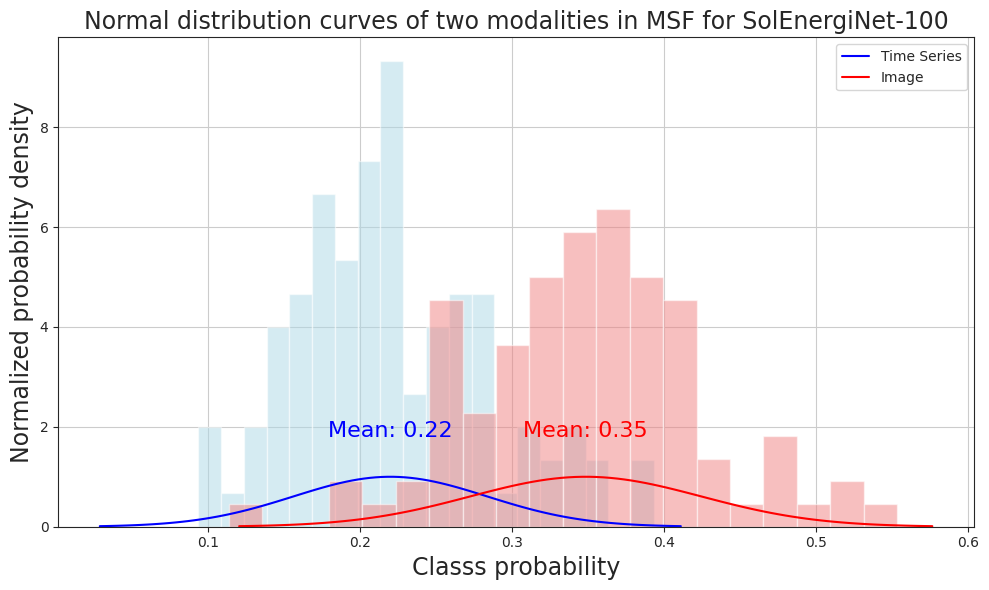

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))

def plot_normal_distributions(list1, list2, bins=20):
    # Calculate the mean and standard deviation for the input lists
    mean1, std_dev1 = np.mean(list1), np.std(list1)
    mean2, std_dev2 = np.mean(list2), np.std(list2)

    # Generate the x-axis values for the histograms
    x1 = np.linspace(mean1 - 3 * std_dev1, mean1 + 3 * std_dev1, 100)
    x2 = np.linspace(mean2 - 3 * std_dev2, mean2 + 3 * std_dev2, 100)

    # Calculate the y-axis values for the normal distributions
    y1 = (1 / (std_dev1 * np.sqrt(2 * np.pi))) * np.exp(-(x1 - mean1) ** 2 / (2 * std_dev1 ** 2))
    y2 = (1 / (std_dev2 * np.sqrt(2 * np.pi))) * np.exp(-(x2 - mean2) ** 2 / (2 * std_dev2 ** 2))

    # Normalize the y-axis values
    y1 /= np.max(y1)
    y2 /= np.max(y2)

    # Plot the normal distributions as lines
    plt.plot(x1, y1, color='blue', label='Time Series')
    plt.plot(x2, y2, color='red', label='Image')

    # Plot the histograms
    plt.hist(list1, bins=bins, density=True, alpha=0.5, color='lightblue')
    plt.hist(list2, bins=bins, density=True, alpha=0.5, color='lightcoral')

    # # Add mean lines
    # plt.axvline(mean1, color='blue', linestyle='--', label='Mean 1')
    # plt.axvline(mean2, color='red', linestyle='--', label='Mean 2')

    # Add mean values as text
    plt.text(mean1, 1.8, f'Mean: {mean1:.2f}', color='blue', ha='center', fontsize=16)
    plt.text(mean2, 1.8, f'Mean: {mean2:.2f}', color='red', ha='center', fontsize=16)

    # Add labels and title
    plt.xlabel('Classs probability', fontsize=17)
    plt.ylabel('Normalized probability density', fontsize=17)
    plt.title('Normal distribution curves of two modalities in MSF for SolEnergiNet-100', fontsize=17)
    plt.legend()

    # Adjust the figure layout
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage
list1 = ts_prob_all
list2 = seq_prob_all
plot_normal_distributions(list1, list2, bins=20)


# CPF-MSTSF

In [ ]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df_B = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
SEP_df = pd.concat([SEP_df_A, SEP_df_B], axis=1)
SEP_df.columns = range(SEP_df.columns.size)
SEP_df

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1015.72614,0.0,1083.20970,0.0,0.0,0.0,1210.5792,1171.85050,953.61690,1218.35520,...,0.004990,0.005160,0.004790,0.005240,0.005060,0.004860,0.005550,0.005060,0.006300,0.005400
1,1016.76434,0.0,1084.26600,0.0,0.0,0.0,1211.6530,1172.86730,954.63340,1219.40750,...,0.004420,0.004270,0.004340,0.004940,0.004650,0.004990,0.006140,0.003890,0.004190,0.004700
2,1164.00300,0.0,1244.80580,0.0,0.0,0.0,1397.3920,1350.77140,1090.26800,1406.52560,...,0.004120,0.003980,0.004270,0.005010,0.005010,0.003880,0.003370,0.004490,0.004560,0.004940
3,1162.81030,0.0,1243.07850,0.0,0.0,0.0,1394.5367,1348.14340,1089.63510,1403.76540,...,0.004420,0.003670,0.003910,0.004420,0.005310,0.004050,0.004650,0.004270,0.003370,0.004780
4,1125.30960,0.0,1202.99900,0.0,0.0,0.0,1349.5297,1304.62950,1054.61680,1358.24610,...,0.004560,0.005010,0.004710,0.005710,0.004940,0.004490,0.003890,0.003620,0.003740,0.004710
5,1196.73220,0.0,1280.73160,0.0,0.0,0.0,1439.0895,1390.56290,1120.73570,1449.05940,...,0.004420,0.003970,0.003980,0.003440,0.003970,0.003670,0.004480,0.004650,0.004420,0.004850
6,1201.72660,0.0,1285.96550,0.0,0.0,0.0,1444.8558,1396.44690,1125.39780,1454.61790,...,0.002470,0.002620,0.002530,0.002390,0.002240,0.002100,0.003070,0.002390,0.002390,0.002170
7,1261.62380,0.0,1349.83130,0.0,0.0,0.0,1516.6761,1465.58020,1181.49450,1526.76720,...,0.002840,0.002390,0.002390,0.002920,0.002920,0.002100,0.002240,0.003290,0.001950,0.002690
8,1290.25650,0.0,1380.79240,0.0,0.0,0.0,1551.9873,1499.56410,1207.85780,1562.26370,...,0.002820,0.002170,0.002920,0.002390,0.002890,0.003220,0.002100,0.002680,0.002540,0.002690
9,1287.90890,0.0,1378.14510,0.0,0.0,0.0,1549.0455,1496.64710,1205.96670,1559.43190,...,0.002390,0.002820,0.003070,0.002390,0.002390,0.003330,0.002920,0.002690,0.002460,0.003440


In [ ]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [ ]:
NSEP_df_78_B = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [ ]:
NSEP_df_78 = pd.concat([NSEP_df_78_A, NSEP_df_78_B], axis=1)
NSEP_df_78.columns = range(NSEP_df_78.columns.size)
NSEP_df_78

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,1002.00555,0.0,1068.6500,0.000000,0.0,0.0,1193.8302,1155.6637,940.97736,1201.4424,...,0.00485,0.00630,0.00583,0.00644,0.00494,0.00501,0.00564,0.00644,0.00681,0.00494
1,1011.28500,0.0,1078.4371,0.000000,0.0,0.0,1205.1554,1166.7772,949.45807,1213.0614,...,0.00521,0.00546,0.00555,0.00593,0.00531,0.00561,0.00615,0.00575,0.00621,0.00397
2,1042.04920,0.0,1111.7778,0.000000,0.0,0.0,1243.1625,1203.3097,978.16455,1251.0493,...,0.00427,0.00434,0.00521,0.00635,0.00516,0.00555,0.00419,0.00479,0.00456,0.00535
3,1036.39310,0.0,1105.7812,0.000000,0.0,0.0,1236.5167,1196.7058,972.88440,1244.3046,...,0.00600,0.00569,0.00471,0.00521,0.00486,0.00516,0.00569,0.00579,0.00465,0.00540
4,1117.79410,0.0,1194.5216,0.000000,0.0,0.0,1338.8112,1294.6129,1047.91560,1347.4849,...,0.00404,0.00521,0.00456,0.00404,0.00546,0.00485,0.00456,0.00569,0.00470,0.00382
5,1167.38570,0.0,1248.1415,0.000000,0.0,0.0,1400.3102,1353.7281,1093.88880,1409.6053,...,0.00419,0.00494,0.00593,0.00486,0.00479,0.00449,0.00485,0.00479,0.00434,0.00420
6,1125.30960,0.0,1202.9990,0.000000,0.0,0.0,1349.5297,1304.6295,1054.61680,1358.2461,...,0.00456,0.00485,0.00555,0.00465,0.00448,0.00486,0.00427,0.00427,0.00347,0.00359
7,1179.87010,0.0,1261.3322,0.000000,0.0,0.0,1415.5133,1368.3427,1105.57580,1424.8320,...,0.00528,0.00404,0.00442,0.00569,0.00333,0.00374,0.00449,0.00478,0.00397,0.00344
8,1166.50760,0.0,1248.0632,0.000000,0.0,0.0,1401.4240,1354.4579,1092.54720,1410.8429,...,0.00427,0.00471,0.00501,0.00564,0.00465,0.00486,0.00391,0.00382,0.00382,0.00376
9,1246.03710,0.0,1333.1517,0.000000,0.0,0.0,1497.9474,1447.4657,1166.80940,1507.8105,...,0.00449,0.00420,0.00546,0.00442,0.00506,0.00509,0.00465,0.00322,0.00434,0.00486


In [ ]:
data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes

<ipython-input-45-d521cdc2284f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
NSEP_start_index = len(SEP_df) + 1

In [ ]:
data['event'] = 'SEP'
data.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all = data
my_data_all

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,event
0,1015.72614,0.0,1083.2097,0.0,0.0,0.0,1210.5792,1171.8505,953.6169,1218.3552,...,0.00516,0.00479,0.00524,0.00506,0.00486,0.00555,0.00506,0.00630,0.00540,SEP
1,1016.76434,0.0,1084.2660,0.0,0.0,0.0,1211.6530,1172.8673,954.6334,1219.4075,...,0.00427,0.00434,0.00494,0.00465,0.00499,0.00614,0.00389,0.00419,0.00470,SEP
2,1164.00300,0.0,1244.8058,0.0,0.0,0.0,1397.3920,1350.7714,1090.2680,1406.5256,...,0.00398,0.00427,0.00501,0.00501,0.00388,0.00337,0.00449,0.00456,0.00494,SEP
3,1162.81030,0.0,1243.0785,0.0,0.0,0.0,1394.5367,1348.1434,1089.6351,1403.7654,...,0.00367,0.00391,0.00442,0.00531,0.00405,0.00465,0.00427,0.00337,0.00478,SEP
4,1125.30960,0.0,1202.9990,0.0,0.0,0.0,1349.5297,1304.6295,1054.6168,1358.2461,...,0.00501,0.00471,0.00571,0.00494,0.00449,0.00389,0.00362,0.00374,0.00471,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1273.13480,0.0,1362.4708,0.0,0.0,0.0,1531.3007,1479.5704,1192.0643,1541.3999,...,0.00333,0.00299,0.00277,0.00369,0.00277,0.00314,0.00277,0.00231,0.00359,NSEP
92,1283.28380,0.0,1373.1991,0.0,0.0,0.0,1543.3767,1491.3495,1201.5770,1553.5410,...,0.00262,0.00359,0.00268,0.00382,0.00314,0.00282,0.00292,0.00150,0.00292,NSEP
93,1264.68820,0.0,1353.1450,0.0,0.0,0.0,1520.3029,1469.2155,1184.4198,1530.2834,...,0.00268,0.00307,0.00187,0.00304,0.00247,0.00239,0.00304,0.00329,0.00262,NSEP
94,1238.20850,0.0,1324.7898,0.0,0.0,0.0,1487.8248,1437.9869,1159.6959,1497.6797,...,0.00246,0.00277,0.00329,0.00188,0.00224,0.00269,0.00292,0.00246,0.00337,NSEP


In [ ]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all.pop('event')
X1 = my_data_all

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(y1)
# y1 = label_encoder.transform(y1)

# y2 = label_encoder.fit_transform(y2)
# y2 = label_encoder.transform(y2)

In [ ]:
def count_elements(lst):
    count_less = 0
    count_greater = 0

    for num in lst:
        if num < 79:
            count_less += 1
        elif num > 79:
            count_greater += 1

    return count_less > count_greater

In [ ]:
import random
from statistics import mean


num_iteration = 100
def random_segmentation(arr, num_segments, ts_seq_length):
    segments = []
    # num_segments = len(arr) // 40  # Number of segments to create
    indice_x_all = []
    for indice_x in range(num_iteration):
        my_indices = list(range(ts_seq_length))

        # Reset the seed
        import importlib
        importlib.reload(random)

        new_indices = random.sample(my_indices, num_segments)
        my_new_indices = new_indices.copy()
        new_indices.sort()
        segment = np.array(arr)[new_indices]
        segments.append(segment)

        # print(my_new_indices)
        result = count_elements(my_new_indices)
        # print(my_new_indices)
        # print(result)
        if result == True:
          indice_x_all.append(indice_x)

    return segments, indice_x_all

In [ ]:
def random_segmentation_test(arr, num_segments_test, ts_seq_length):
    segments_test = []
    # num_segments = len(arr) // 40  # Number of segments to create
    my_indices = list(range(ts_seq_length))

    #set the seed
    random.seed(42)

    new_indices = random.sample(my_indices, num_segments_test)
    new_indices.sort()
    segment_test = np.array(arr)[new_indices]
    segments_test.append(segment_test)

    return segments_test

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all = []
f1_all = []
precision_all = []
recall_all = []
TSS_all = []
HSS_all = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]


    X_train1 = np.array(X_train1)
    X_test1 = np.array(X_test1)
    y_train1 = np.array(y_train1)
    y_test1 = np.array(y_test1)


    from sklearn.preprocessing import StandardScaler
    trans = StandardScaler()
    X_train1 = trans.fit_transform(X_train1)
    X_test1 = trans.transform(X_test1)


    # X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    # y_train2, y_test2 = y2[train_index], y2[test_index]


    # X_train2 = np.array(X_train2)
    # X_test2 = np.array(X_test2)
    # y_train2 = np.array(y_train2)
    # y_test2 = np.array(y_test2)



    segments_all1 = []
    for i in range(X_train1.shape[0]):
      array_ori_ = X_train1[i]
      array = array_ori_.copy()
      array1 = array.tolist()
      # num_segments1 = 110
      num_segments1 = 150
      segments1, my_ts_indices = random_segmentation(array1, num_segments1, 160)
      segments_all1.append(segments1)

    segments_all1_test = []
    for ii in range(X_test1.shape[0]):
      array_ori_ = X_test1[ii]
      array = array_ori_.copy()
      array1 = array.tolist()
      num_segments1 = 150
      segments1 = random_segmentation_test(array1, num_segments1, 160)
      segments_all1_test.append(segments1)


    ts_pred_all = []
    npy_segments1 = np.asarray(segments_all1)
    for j in range(num_iteration):

      ts_classifier = TimeSeriesForestClassifier(n_estimators=150, random_state = 42)
      ts_classifier.fit(npy_segments1[: , j], y_train1)
      ts_pred = ts_classifier.predict_proba(np.array(segments_all1_test).reshape(X_test1.shape[0], num_segments1))
      ts_pred_all.append(ts_pred)






    # segments_all2 = []
    # for k in range(X_train1.shape[0]):
    #   array_ori_ = X_train2[k]
    #   array = array_ori_.copy()
    #   array2 = array.tolist()
    #   num_segments2 = 60
    #   segments2 = random_segmentation(array2, num_segments2)
    #   segments_all2.append(segments2)


    # segments_all2_test = []
    # for kk in range(X_test2.shape[0]):
    #   array_ori_ = X_test2[kk]
    #   array = array_ori_.copy()
    #   array2 = array.tolist()
    #   num_segments2 = 60
    #   segments2 = random_segmentation_test(array2, num_segments2)
    #   segments_all2_test.append(segments2)


    # seq_pred_all = []
    # npy_segments2 = np.asarray(segments_all2)
    # for l in range(num_iteration):

    #   seq_classifier = TimeSeriesForestClassifier(n_estimators=50, random_state = 42)
    #   seq_classifier.fit(npy_segments2[: , l], y_train2)
    #   seq_pred = seq_classifier.predict_proba(np.array(segments_all2_test).reshape(X_test2.shape[0], num_segments2))
    #   seq_pred_all.append(seq_pred)


    accuracy_part = []
    f1_part = []
    precision_part = []
    recall_part = []
    TSS_part = []
    HSS_part = []
    combined_pred1_part = [] # !!!
    for p in range(num_iteration):
      # Concatenate and merge the predicted probabilities
      combined_pred0 = np.concatenate((ts_pred_all[p][:, 0].reshape(-1, 1), ts_pred_all[p][:, 0].reshape(-1, 1)), axis=1)
      merged_pred0 = np.mean(combined_pred0, axis=1)

      # Concatenate and merge the predicted probabilities
      combined_pred1 = np.concatenate((ts_pred_all[p][:, 1].reshape(-1, 1), ts_pred_all[p][:, 1].reshape(-1, 1)), axis=1)
      merged_pred1 = np.mean(combined_pred1, axis=1)



      # Classify events based on merged predictions
      event_pred = np.round(merged_pred1) # Correct one. It say that it predicts 1 because merged_pred1 relates to label 1 (I think Probably NSEP)


      accuracy = accuracy_score(y_test1, event_pred)  # y_test1 or y_test2 ... No matter
      f1 = f1_score(y_test1, event_pred, average = 'macro')  # , average="weighted"
      precision = precision_score(y_test1, event_pred, average = 'macro')
      recall = recall_score(y_test1, event_pred, average = 'macro')
      tn, fp, fn, tp = confusion_matrix(y_test1, event_pred).ravel()
      TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
      HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))


      accuracy_part.append(accuracy)
      f1_part.append(f1)
      precision_part.append(precision)
      recall_part.append(recall)
      TSS_part.append(TSS_TSF_A)
      HSS_part.append(HSS_TSF_A)

      combined_pred1_part.append(combined_pred1) # !!!


    accuracy_all.append(mean(accuracy_part))
    f1_all.append(mean(f1_part))
    precision_all.append(mean(precision_part))
    recall_all.append(mean(recall_part))
    TSS_all.append(mean(TSS_part))
    HSS_all.append(mean(HSS_part))













In [ ]:
precision_all_Approach2 = precision_all
precision_all_Approach2

[0.8420049256299257,
 0.8149810606060607,
 0.8432433261183262,
 0.8915340909090909,
 0.8626262626262627]

In [ ]:
precision_all_Approach2_m = round(np.mean(precision_all_Approach2), 2)
precision_all_Approach2_m

0.85

In [ ]:
recall_all_Approach2 = recall_all
recall_all_Approach2

[0.8300000000000001,
 0.8141111111111111,
 0.8372777777777778,
 0.8906666666666666,
 0.8498888888888889]

In [ ]:
recall_all_Approach2_m = round(np.mean(recall_all_Approach2), 2)
recall_all_Approach2_m

0.84

In [ ]:
TSS_all_Approach2 = TSS_all
TSS_all_Approach2

[0.66,
 0.6282222222222222,
 0.6745555555555556,
 0.7813333333333334,
 0.6997777777777778]

In [ ]:
TSS_all_Approach2_m = round(np.mean(TSS_all_Approach2), 2)
TSS_all_Approach2_m

0.69

In [ ]:
HSS_all_Approach2 = HSS_all
HSS_all_Approach2

[0.6599999999999999,
 0.6256418486363238,
 0.6768547325349779,
 0.7798131265526556,
 0.7047121266015246]

In [ ]:
HSS_all_Approach2_m = round(np.mean(HSS_all_Approach2), 2)
HSS_all_Approach2_m

0.69

In [ ]:
ts_prob_all = []
seq_prob_all = []
for i in combined_pred1_part:
  ts_prob = i[1][0]
  ts_prob_all.append(ts_prob)

  seq_prob = i[1][1]
  seq_prob_all.append(seq_prob)

In [ ]:
ts_prob_all = np.array(ts_prob_all)[my_ts_indices]
ts_prob_all = ts_prob_all.tolist()


In [ ]:
def get_remaining_elements(lst, given_elements):
    remaining_elements = [element for element in lst if element not in given_elements]
    return remaining_elements

my_list = list(range(num_iteration))
my_seq_indices = get_remaining_elements(my_list, my_ts_indices)


In [ ]:
seq_prob_all = np.array(seq_prob_all)[my_seq_indices]
seq_prob_all = seq_prob_all.tolist()


In [ ]:
sns.despine(top=False, right=False, left=False, bottom=False)
# sns.set_style("whitegrid")

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set_style("ticks",{'axes.grid' : True})

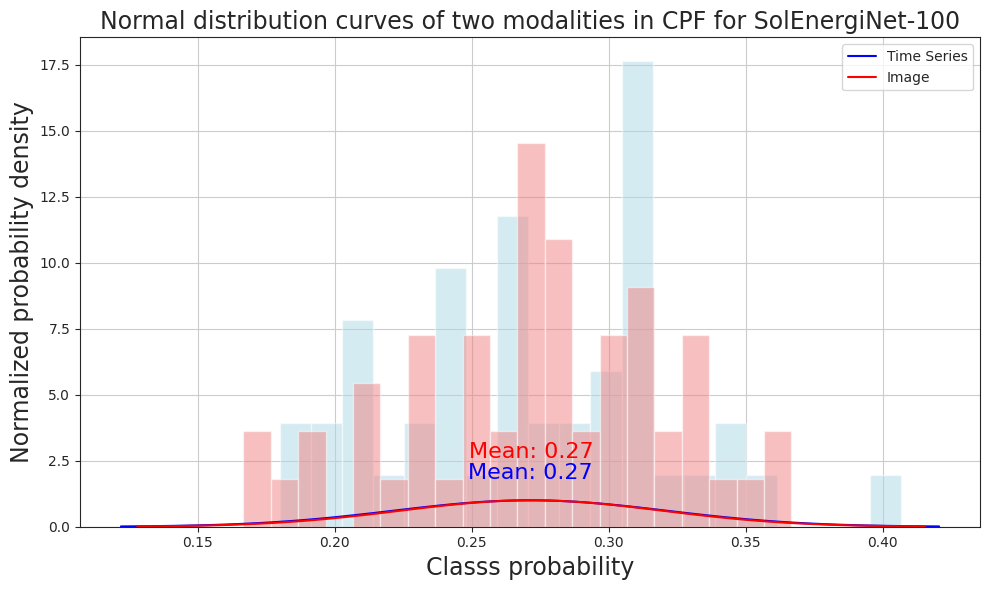

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))

def plot_normal_distributions(list1, list2, bins=20):
    # Calculate the mean and standard deviation for the input lists
    mean1, std_dev1 = np.mean(list1), np.std(list1)
    mean2, std_dev2 = np.mean(list2), np.std(list2)

    # Generate the x-axis values for the histograms
    x1 = np.linspace(mean1 - 3 * std_dev1, mean1 + 3 * std_dev1, 100)
    x2 = np.linspace(mean2 - 3 * std_dev2, mean2 + 3 * std_dev2, 100)

    # Calculate the y-axis values for the normal distributions
    y1 = (1 / (std_dev1 * np.sqrt(2 * np.pi))) * np.exp(-(x1 - mean1) ** 2 / (2 * std_dev1 ** 2))
    y2 = (1 / (std_dev2 * np.sqrt(2 * np.pi))) * np.exp(-(x2 - mean2) ** 2 / (2 * std_dev2 ** 2))

    # Normalize the y-axis values
    y1 /= np.max(y1)
    y2 /= np.max(y2)

    # Plot the normal distributions as lines
    plt.plot(x1, y1, color='blue', label='Time Series')
    plt.plot(x2, y2, color='red', label='Image')

    # Plot the histograms
    plt.hist(list1, bins=bins, density=True, alpha=0.5, color='lightblue')
    plt.hist(list2, bins=bins, density=True, alpha=0.5, color='lightcoral')

    # # Add mean lines
    # plt.axvline(mean1, color='blue', linestyle='--', label='Mean 1')
    # plt.axvline(mean2, color='red', linestyle='--', label='Mean 2')

    # Add mean values as text
    plt.text(mean1, 1.8, f'Mean: {mean1:.2f}', color='blue', ha='center', fontsize=16)
    plt.text(mean2, 2.6, f'Mean: {mean2:.2f}', color='red', ha='center', fontsize=16)

    # Add labels and title
    plt.xlabel('Classs probability', fontsize=17)
    plt.ylabel('Normalized probability density', fontsize=17)
    plt.title('Normal distribution curves of two modalities in CPF for SolEnergiNet-100', fontsize=17)
    plt.legend()

    # Adjust the figure layout
    plt.tight_layout()

    # Display the plot
    plt.show()

# Example usage
list1 = ts_prob_all
list2 = seq_prob_all
plot_normal_distributions(list1, list2, bins=20)
